In [ ]:
import os

import yaml

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from madness_deblender.FlowVAEnet import FlowVAEnet
from madness_deblender.utils import get_data_dir_path, get_madness_deblender_config_path

mpl.rcParams["savefig.dpi"] = 1200

%matplotlib inline

In [ ]:
with open(get_madness_deblender_config_path()) as f:
    madness_deblender_config = yaml.safe_load(f)
btksims_config = madness_deblender_config["btksims"]
survey_name = madness_deblender_config["survey_name"]

## Simulation (train/validation set) examples

In [ ]:
blended_images_dir = os.path.join(
    btksims_config["TRAIN_DATA_SAVE_PATH"][survey_name], "blended_validation"
)

In [ ]:
filename = random.choice(os.listdir(blended_images_dir))

In [ ]:
linear_norm_coeff = 10000

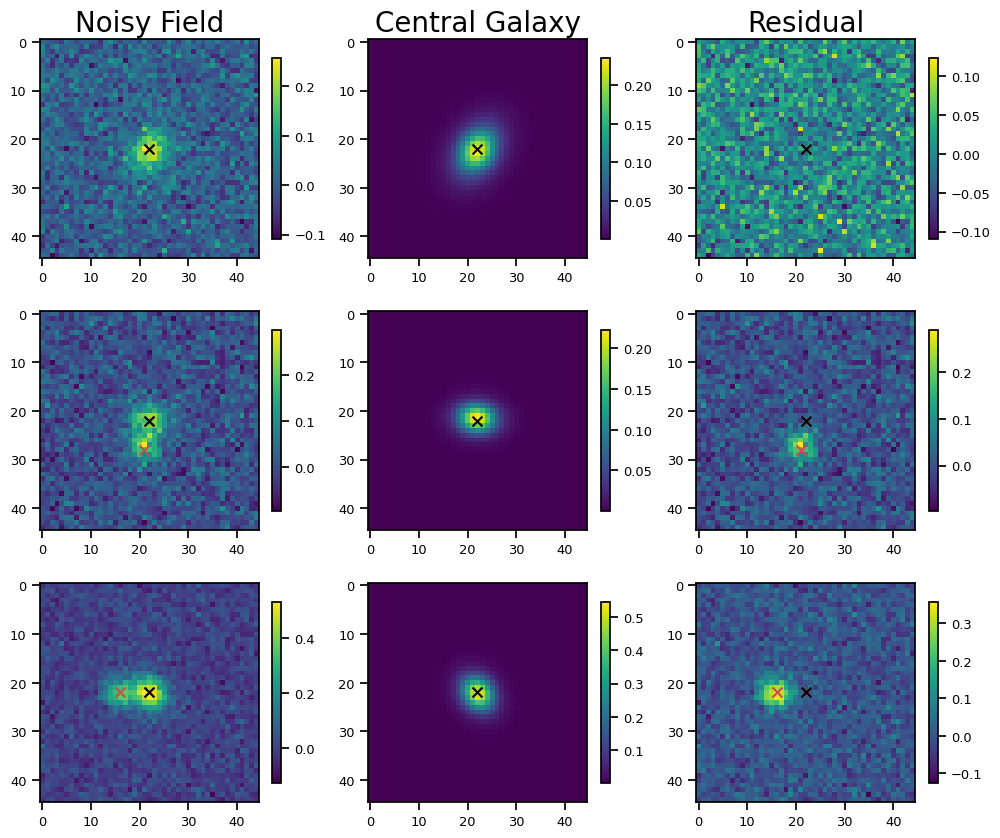

In [ ]:
sns.set_theme(
    font_scale=0.85,
    style={"axes.grid": False, "image.cmap": "viridis"},
)

fig, axs = plt.subplots(3, 3, figsize=(12, 10))

rng = np.random.default_rng(seed=13)

band = 2

for i in range(3):
    filename = random.choice(os.listdir(blended_images_dir))
    blended_images = np.load(
        os.path.join(blended_images_dir, filename), allow_pickle=True
    )
    im = axs[i, 0].imshow(
        blended_images["blended_gal_stamps"][0][:, :, band] / linear_norm_coeff
    )
    cbar = fig.colorbar(im, ax=axs[i, 0], shrink=0.8)
    #     cbar.ax.tick_params(labelsize=13)

    im = axs[i, 1].imshow(
        blended_images["isolated_gal_stamps"][0][:, :, band] / linear_norm_coeff
    )
    cbar = fig.colorbar(im, ax=axs[i, 1], shrink=0.8)
    #     cbar.ax.tick_params(labelsize=13)

    difference = (
        blended_images["blended_gal_stamps"][0][:, :, band]
        - blended_images["isolated_gal_stamps"][0][:, :, band]
    )
    im = axs[i, 2].imshow(difference / linear_norm_coeff)
    cbar = fig.colorbar(im, ax=axs[i, 2], shrink=0.8)
    #     cbar.ax.tick_params(labelsize=13)

    for num_gal in range(len(blended_images["gal_locations_x_peak"][0])):

        axs[i, 0].scatter(
            np.round(blended_images["gal_locations_x_peak"][0][num_gal]) + 22,
            np.round(blended_images["gal_locations_y_peak"][0][num_gal]) + 22,
            c="r",
            marker="x",
            s=50,
        )

        axs[i, 2].scatter(
            np.round(blended_images["gal_locations_x_peak"][0][num_gal]) + 22,
            np.round(blended_images["gal_locations_y_peak"][0][num_gal]) + 22,
            c="r",
            marker="x",
            s=50,
        )

    for col_num in range(3):
        axs[i, col_num].scatter(22, 22, c="black", marker="x", s=50)
#         axs[i, col_num].tick_params(axis="both", which="major", labelsize=13)


axs[0, 0].set_title("Noisy Field", fontsize=20)
axs[0, 1].set_title("Central Galaxy", fontsize=20)
axs[0, 2].set_title("Residual", fontsize=20)
plt.savefig("results/temp/blended_galaxies")
plt.savefig("results/blended_galaxies.pdf", bbox_inches="tight")

# Make plots for isolated galaxies

In [ ]:
isolated_images_dir = os.path.join(
    btksims_config["TRAIN_DATA_SAVE_PATH"][survey_name], "isolated_training"
)

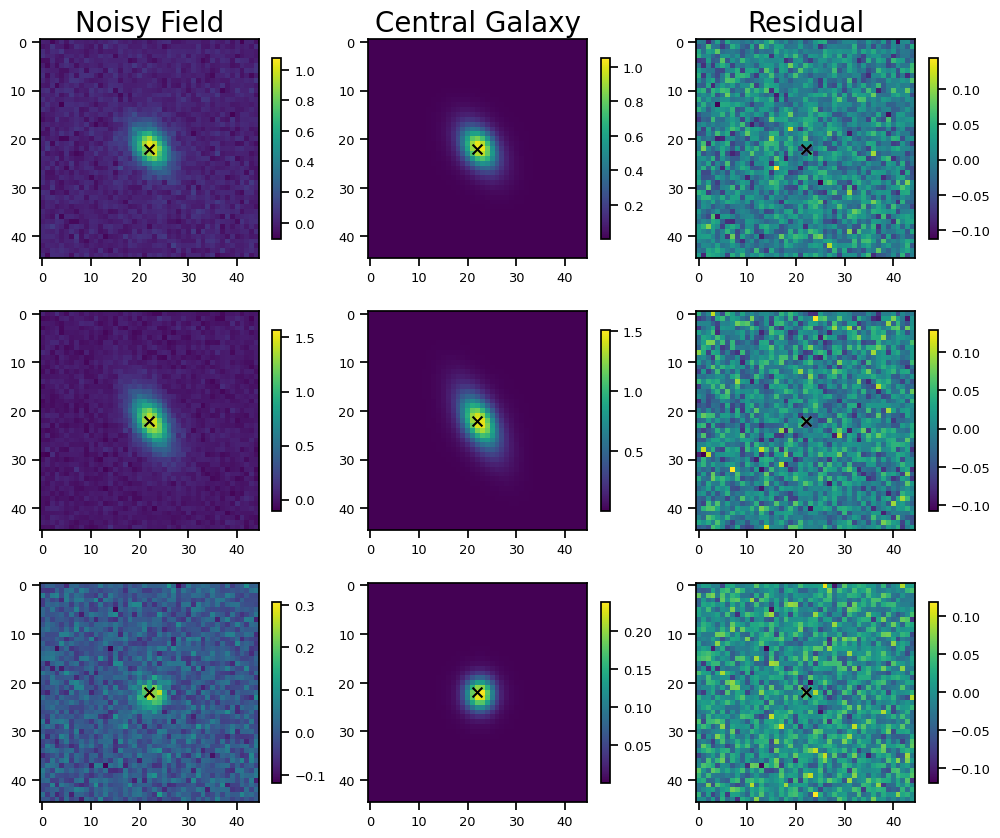

In [ ]:
sns.set_theme(
    font_scale=0.85,
    style={"axes.grid": False, "image.cmap": "viridis"},
)

fig, axs = plt.subplots(3, 3, figsize=(12, 10))

rng = np.random.default_rng(seed=5)

band = 2

for i in range(3):
    filename = random.choice(os.listdir(isolated_images_dir))
    blended_images = np.load(
        os.path.join(isolated_images_dir, filename), allow_pickle=True
    )
    im = axs[i, 0].imshow(
        blended_images["blended_gal_stamps"][0][:, :, band] / linear_norm_coeff
    )
    cbar = fig.colorbar(im, ax=axs[i, 0], shrink=0.8)
    #     cbar.ax.tick_params(labelsize=13)

    im = axs[i, 1].imshow(
        blended_images["isolated_gal_stamps"][0][:, :, band] / linear_norm_coeff
    )
    cbar = fig.colorbar(im, ax=axs[i, 1], shrink=0.8)
    #     cbar.ax.tick_params(labelsize=13)

    difference = (
        blended_images["blended_gal_stamps"][0][:, :, band]
        - blended_images["isolated_gal_stamps"][0][:, :, band]
    )
    im = axs[i, 2].imshow(difference / linear_norm_coeff)
    cbar = fig.colorbar(im, ax=axs[i, 2], shrink=0.8)
    #     cbar.ax.tick_params(labelsize=13)

    for num_gal in range(len(blended_images["gal_locations_x_peak"][0])):

        axs[i, 0].scatter(
            np.round(blended_images["gal_locations_x_peak"][0][num_gal]) + 22,
            np.round(blended_images["gal_locations_y_peak"][0][num_gal]) + 22,
            c="r",
            marker="x",
            s=50,
        )

        axs[i, 2].scatter(
            np.round(blended_images["gal_locations_x_peak"][0][num_gal]) + 22,
            np.round(blended_images["gal_locations_y_peak"][0][num_gal]) + 22,
            c="r",
            marker="x",
            s=50,
        )

    for col_num in range(3):
        axs[i, col_num].scatter(22, 22, c="black", marker="x", s=50)
#         axs[i, col_num].tick_params(axis="both", which="major", labelsize=13)


axs[0, 0].set_title("Noisy Field", fontsize=20)
axs[0, 1].set_title("Central Galaxy", fontsize=20)
axs[0, 2].set_title("Residual", fontsize=20)
plt.savefig("results/temp/isolated_galaxies")
plt.savefig("results/isolated_galaxies.pdf", bbox_inches="tight")

In [ ]:
data_dir = get_data_dir_path()

tf.get_logger().setLevel("ERROR")
latent_dim = 16
num_nf_layers = 6
kl_weight = 1

model_path = os.path.join(data_dir, "LSST0.01/")

flow_net = FlowVAEnet(latent_dim=latent_dim, num_nf_layers=num_nf_layers)

flow_net.load_flow_weights(weights_path=os.path.join(model_path, "flow/val_loss"))
flow_net.load_vae_weights(weights_path=os.path.join(model_path, "vae/val_loss"))
flow_net.load_encoder_weights(
    weights_path=os.path.join(model_path, "deblender/val_loss")
)
flow_net.vae_model.trainable = False

In [ ]:
tf.get_logger().setLevel("ERROR")
model_vae_output_isolated = flow_net.vae_model(
    np.array(list(blended_images["blended_gal_stamps"])) / linear_norm_coeff
)

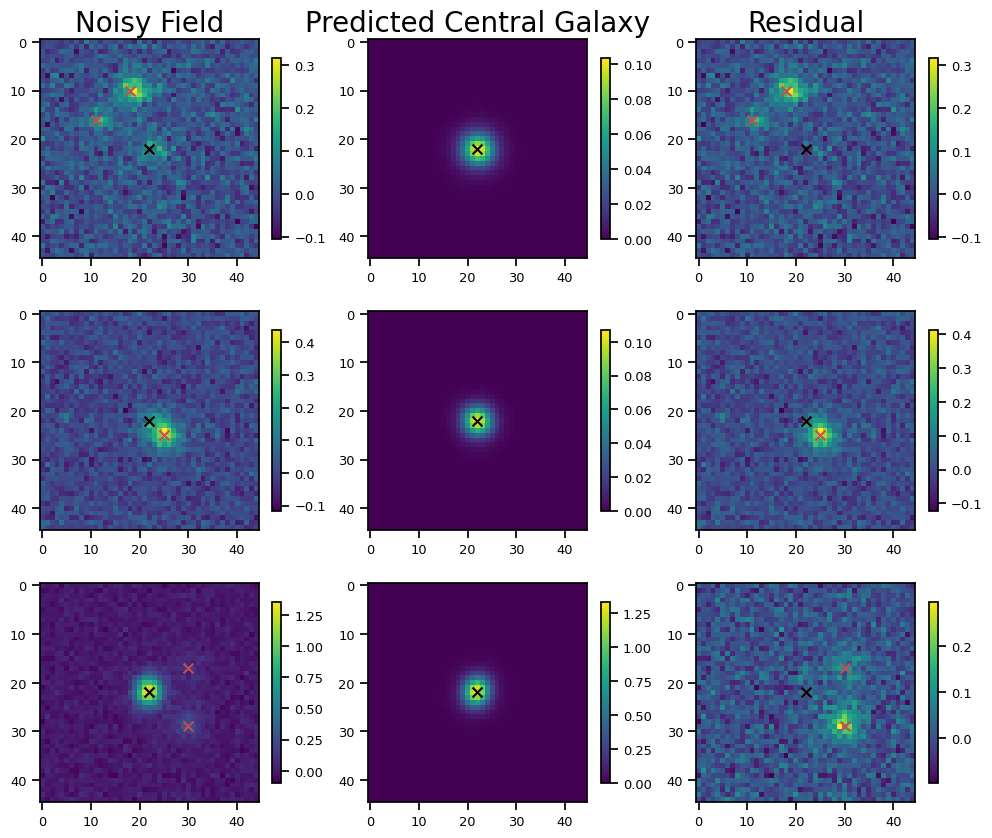

In [ ]:
sns.set_theme(
    font_scale=0.85,
    style={"axes.grid": False, "image.cmap": "viridis"},
)

fig, axs = plt.subplots(3, 3, figsize=(12, 10))

rng = np.random.default_rng(seed=13)

band = 2

for i in range(3):
    filename = random.choice(os.listdir(blended_images_dir))
    blended_images = np.load(
        os.path.join(blended_images_dir, filename), allow_pickle=True
    )

    model_vae_output_isolated = flow_net.vae_model(
        np.array(list(blended_images["blended_gal_stamps"])) / linear_norm_coeff
    )

    im = axs[i, 0].imshow(
        blended_images["blended_gal_stamps"][0][:, :, band] / linear_norm_coeff
    )
    cbar = fig.colorbar(im, ax=axs[i, 0], shrink=0.8)
    #     cbar.ax.tick_params(labelsize=13)

    im = axs[i, 1].imshow(model_vae_output_isolated[0][:, :, band])
    cbar = fig.colorbar(im, ax=axs[i, 1], shrink=0.8)
    #     cbar.ax.tick_params(labelsize=13)

    difference = (
        blended_images["blended_gal_stamps"][0][:, :, band] / linear_norm_coeff
        - model_vae_output_isolated[0][:, :, band]
    )
    im = axs[i, 2].imshow(difference)
    cbar = fig.colorbar(im, ax=axs[i, 2], shrink=0.8)
    #     cbar.ax.tick_params(labelsize=13)

    for num_gal in range(len(blended_images["gal_locations_x_peak"][0])):

        axs[i, 0].scatter(
            np.round(blended_images["gal_locations_x_peak"][0][num_gal]) + 22,
            np.round(blended_images["gal_locations_y_peak"][0][num_gal]) + 22,
            c="r",
            marker="x",
            s=50,
        )

        axs[i, 2].scatter(
            np.round(blended_images["gal_locations_x_peak"][0][num_gal]) + 22,
            np.round(blended_images["gal_locations_y_peak"][0][num_gal]) + 22,
            c="r",
            marker="x",
            s=50,
        )

    for col_num in range(3):
        axs[i, col_num].scatter(22, 22, c="black", marker="x", s=50)
#         axs[i, col_num].tick_params(axis="both", which="major", labelsize=13)


axs[0, 0].set_title("Noisy Field", fontsize=20)
axs[0, 1].set_title("Predicted Central Galaxy", fontsize=20)
axs[0, 2].set_title("Residual", fontsize=20)
plt.savefig("results/temp/VAEDeblender")
plt.savefig("results/VAEDeblender.pdf", bbox_inches="tight")